<a href="https://colab.research.google.com/github/zuzKomar/PAD/blob/main/PAD05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pycountry -q
!pip install pycountry_convert -q

     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 316 kB 7.7 MB/s 
     |████████████████████████████████| 217 kB 53.8 MB/s 
     |████████████████████████████████| 298 kB 67.2 MB/s 
     |████████████████████████████████| 297 kB 67.2 MB/s 
     |████████████████████████████████| 297 kB 53.1 MB/s 
     |████████████████████████████████| 297 kB 68.8 MB/s 
     |████████████████████████████████| 296 kB 69.6 MB/s 
     |████████████████████████████████| 296 kB 72.1 MB/s 
     |████████████████████████████████| 280 kB 65.2 MB/s 
     |████████████████████████████████| 280 kB 52.0 MB/s 
     |████████████████████████████████| 280 kB 53.3 MB/s 
     |████████████████████████████████| 280 kB 48.2 MB/s 
     |████████████████████████████████| 279 kB 46.1 MB/s 
     |████████████████████████████████| 279 kB 67.4 MB/s 
     

In [4]:
import warnings;   warnings.filterwarnings("ignore")

# Wizualizacja Danych

EDA jest skrótem od **E**xploratory **D**ata **A**nalysis i EDA jest kluczowym etapem poprzedzającym stosowanie modelu ML. Jak sama nazwa wskazuje, chodzi o eksplorację danych — sprawdzenie, czy zestaw danych, nad którym będziesz pracować, jest spójny i nie zawiera brakujących wartości. Ważnym elementem jest także wizualizacja samuych danych aby lepiej przyjrzeć się ich dystrybucji (rozmieszczeniu) i zachowdzącym relacjom. 

Warto przy tym zauważyć, że nie każdy problem wymaga zastosowania uczenia maszynowego. Być może w pracy zadaniem będzie wizualizacja danych w celu analizy i przedstawienia najciekawszych spostrzeżeń, które cięzko by było zauważyć patrząć na suche dane w tabeli.

Przy formułowaniu problemu ważne jest postawienie hipotezy. To pomoże nam lepiej wybrać dane do analizy.
Aby wyjaśnić, dlaczego jest to konieczne, poniższy obraz przedstawia coś znanego jako *Kwartet Ascomebe'a*:

<img src="https://www.researchgate.net/profile/Arch_Woodside2/publication/285672900/figure/fig4/AS:305089983074309@1449750528742/Anscombes-quartet-of-different-XY-plots-of-four-data-sets-having-identical-averages.png">

Źródło: https://www.researchgate.net/publication/285672900_The_general_theory_of_culture_entrepreneurship_innovation_and_quality-of-life_Comparing_nurturing_versus_thwarting_enterprise_start-ups_in_BRIC_Denmark_Germany_and_the_United_States

Kwartet Ascomebe'a jest przykładem, dlaczego wizualizacja naszych danych ma ogromne znaczenie. Obraz pokazuje nam, że statystyki podsumowujące (np. średnia, wariancja) dla wszystkich danych są takie same. Jednak, jak widać, rozkłady, z których pochodzą dane, są szalenie różne. Gdybyśmy nie wizualizowali naszych danych, nie bylibyśmy w stanie w prosty sposób zidentyfikować zależności między danymi.

W tym notatniku przedstawiam uproszczony proces EDA w celach dydaktycznych. 
W rzeczywistości czyszczenie i usuwanie brakujących danych podlega parasolowi EDA i będzie to cykliczny proces, w którym eksplorujesz swoje dane, identyfikujesz probloemy, czyścisz je i ponownie eksplorujesz.


Będziemy pracować z plikiem „multiple_choice_responses.csv” z [2019 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2019/data?select=multiple_choice_responses.csv), ktÓry zawiera 35 pytań przeprowadzonych na użytkownikach Kaggle, dotyczących stanu nauki o danych i uczenia maszynowego. Według abstraktu, ankieta ta otrzymała 19 717 użytecznych respondentów ze 171 krajów i terytoriów. Jeśli kraj lub terytorium otrzymało mniej niż 50 respondentów, pogrupowaliśmy ich w grupę o nazwie „Inne” w celu zachowania anonimowości. Zadaniem, które stoi przed nami jest określenie, jakie czynniki mają istotny wpływ na roczną pensję osób w DSML (Data Science i Machine Learning).



In [6]:
## Załaduj dane i wypisz pierwsze wiersze
import pandas as pd
pd.options.display.max_columns = None

path = './drive/MyDrive/PAD05'
df = pd.read_csv(f"{path}/multiple_choice_responses.csv")
df.head(3)

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                 510                        22-24   
2                                 423                        40-44   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                    Male   
2                                    Male   

                                       Q2_OTHER_TEXT  \
0  What is your gender? - Prefer to self-describe...   
1                                                 -1   
2                                                 -1   

                                          Q3  \
0  In which country do you currently reside?   
1                                     France   
2                                      India   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Master’s degree   
2                                Professional degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                  Software Engineer   
2                                  Software Engineer   

                                       Q5_OTHER_TEXT  \
0  Select the title most similar to your current ...   
1                                                 -1   
2                                                 -1   

                                                  Q6  \
0  What is the size of the company where you are ...   
1                               1000-9,999 employees   
2                                 > 10,000 employees   

                                                  Q7  \
0  Approximately how many individuals are respons...   
1                                                  0   
2                                                20+   

                                                  Q8  \
0  Does your current employer incorporate machine...   
1                                      I do not know   
2  We have well established ML methods (i.e., mod...   

                                           Q9_Part_1  \
0  Select any activities that make up an importan...   
1                                                NaN   
2  Analyze and understand data to influence produ...   

                                           Q9_Part_2  \
0  Select any activities that make up an importan...   
1                                                NaN   
2  Build and/or run the data infrastructure that ...   

                                           Q9_Part_3  \
0  Select any activities that make up an importan...   
1                                                NaN   
2  Build prototypes to explore applying machine l...   

                                           Q9_Part_4  \
0  Select any activities that make up an importan...   
1                                                NaN   
2  Build and/or run a machine learning service th...   

                                           Q9_Part_5  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   

                                           Q9_Part_6  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   

                                           Q9_Part_7  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   

                                           Q9_Part_8  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                            

In [7]:
## Mamy też plik "questions_only.csv". Załaduj go i wczytaj wszystkie pytania
q_df = pd.read_csv(f"{path}/questions_only.csv")
for i, question in enumerate(q_df.iloc[0]):

    print(i, "\t", question)

0 	 Duration (in seconds)
1 	 What is your age (# years)?
2 	 What is your gender? - Selected Choice
3 	 In which country do you currently reside?
4 	 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
5 	 Select the title most similar to your current role (or most recent title if retired): - Selected Choice
6 	 What is the size of the company where you are employed?
7 	 Approximately how many individuals are responsible for data science workloads at your place of business?
8 	 Does your current employer incorporate machine learning methods into their business?
9 	 Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
10 	 What is your current yearly compensation (approximate $USD)?
11 	 Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
12 	 Who/what are your favorite media sources tha

Wstępnie możemy zauważyć, że:
- Jest wiele pytań (dużo danych do przeanalizowania)
- Niektóre pytania pozwalają na wiele danych wejściowych (pytania wielokrotnego wyboru). W przypadku tych pytań nazwy wierszy/kolumn nagłówka mają dodany znak `_`, po którym następuje jakiś tekst.
  - Jeśli tekst to `OTHER_TEXT`, to wydaje się wskazywać, że po kategorycznym pytaniu wyświetlane jest pole tekstowe z opcją rozwinięcia dla odbiorcy. Wygląda na to, że -1 oznacza, że użytkownik nic nie napisał.
  - Jeśli tekt to `PART_N`, wówczas wydaje się to być pytaniem wielokrotnego wyboru do zaznaczenia. 
  - Nie wykluczają się wzajemnie

Analiza tych danych kolumna po kolumnie zajmie zbyt wiele czasu. Zamierzamy więc zdecydować o czynnikach, które naszym zdaniem mogą mieć wpływ na wynagrodzenie, i wyodrębnimy z listy odpowiednie pytania, które spełniają te kryteria. Częściowo dlatego nauka o danych jest uważana za sztukę – możesz mieć do czynienia z ogromnym zbiorem danych i nie mieć pewności, od czego zacząć analizę. Korzystając ze swojej hipotezy i identyfikując, co próbujesz modelować, musisz użyć swojej intuicji, co do czynników, które Twoim zdaniem będą miały na to duży wpływ. Dlatego ważna jest znajomość dziedziny. Ale im więcej eksplorujesz swoje dane z początkowymi koncepcjami, które miałeś na myśli, tym więcej w końcu dowiesz się o szerszym zbiorze danych.
  
- Salary (target)
- Age
- Gender
- Residence
- Education
- Job role/Experience
- Programming languages
- ML frameworks

Z tej listy wyodrębnimy następujące pytania:
**Q:** 1, 2, 3, 4, 5, 9, **10**, 15, 18, 24, 28.

Jest  kilka innych, które również byłyby istotne do analizy - w idealnym świecie też byśmy je analizowali, ale tutaj czas jest ograniczony - i ważne jest, aby nauczyć Cię różnych technik wizualizacyjnych, jednocześnie budując intuicję, na co patrzeć w danych.

Niektóre z tych pytań obejmują wiele kolumn w naszej ramce danych. Wyodrębnianie odpowiednich kolumn, które chcemy, nie jest najprostszym zadaniem. Poświęć trochę czasu, aby spróbować zaimplementować coś, co zwraca nową ramkę danych zawierającą odpowiednie kolumny. Jeśli po kilku minutach nie masz pewności, jak postępować, kliknij poniżej, aby spróbować zaimplementować metodę, której ja bym użyła.


<details>
    <summary><b>Kliknij tutaj, aby zobaczyć co bym zrobiła</b></summary>
    <ul>
        <li>Zdefiniuj funkcję, która iteruje po liście integerów odpowiadającyh pytaniom, które chcemy zachować</li>
        <li>Dla każdej iteracji oblicz ilość kolumn od bieżącego pytania do następnego pytania w ramce danych (NIE następnego pytania, które chcemy wyodrębnić)</li>
        <li>Wyodrębnij/konkatenuj z bieżącej pozycji kolumny do bieżącej pozycji kolumny + 'odległość' (możesz skorzystać z funkcji <code>range()</code>)</li> 
    </ul>
</details>


#### rozwiazanie

In [8]:
idx_to_keep = [1,2,3,4,5,9,10,15,18,24,28]

def extract_columns(df, idx_to_keep):
    
    new_df = pd.DataFrame() # pusty dataframe
    df_col_list = df.columns.tolist()
    
    for i in idx_to_keep:
        column_name_base = "Q{}".format(i)
        column_index = [df_col_list.index(col_name) for col_name in df_col_list if col_name.startswith(column_name_base)][0]
               
        next_column_name_base = "Q{}".format(i+1)
        next_column_index = [df_col_list.index(col_name) for col_name in df_col_list if col_name.startswith(next_column_name_base)][0]
         
        col_idxs_to_extract = range(column_index, next_column_index)
        relevant_cols_df = df.iloc[:, col_idxs_to_extract]
        
        new_df = pd.concat([new_df, relevant_cols_df], axis=1)
        
    return new_df


df_orig = df.copy(deep=True)
df = extract_columns(df_orig, idx_to_keep)
df = df[1:]
df

Q1      Q2 Q2_OTHER_TEXT         Q3                   Q4  \
1      22-24    Male            -1     France      Master’s degree   
2      40-44    Male            -1      India  Professional degree   
3      55-59  Female            -1    Germany  Professional degree   
4      40-44    Male            -1  Australia      Master’s degree   
5      22-24    Male            -1      India    Bachelor’s degree   
...      ...     ...           ...        ...                  ...   
19713  50-54    Male            -1      Japan                  NaN   
19714  18-21    Male            -1      India    Bachelor’s degree   
19715  35-39    Male            -1      India      Master’s degree   
19716  25-29    Male            -1      India      Master’s degree   
19717  50-54    Male            -1     France    Bachelor’s degree   

                      Q5 Q5_OTHER_TEXT  \
1      Software Engineer            -1   
2      Software Engineer            -1   
3                    NaN            -1   
4                  Other             0   
5                  Other             1   
...                  ...           ...   
19713                NaN            -1   
19714              Other            -1   
19715            Student            -1   
19716       Statistician            -1   
19717  Software Engineer            -1   

                                               Q9_Part_1  \
1                                                    NaN   
2      Analyze and understand data to influence produ...   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
19713                                                NaN   
19714                                                NaN   
19715                                                NaN   
19716                                                NaN   
19717                                                NaN   

                                               Q9_Part_2  \
1                                                    NaN   
2      Build and/or run the data infrastructure that ...   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
19713                                                NaN   
19714                                                NaN   
19715                                                NaN   
19716                                                NaN   
19717  Build and/or run the data infrastructure that ...   

                                               Q9_Part_3  \
1                                                    NaN   
2      Build prototypes to explore applying machine l...   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
19713                                                NaN   
19714                                                NaN   
19715                                                NaN   
19716                                                NaN   
19717  Build prototypes to explore applying machine l...   

                                               Q9_Part_4 Q9_Part_5 Q9_Part_6  \
1                                                    NaN       NaN       NaN   
2      Build and/or run a machine learning service th...       NaN       NaN   
3                                                    NaN       NaN       NaN   
4                                                    NaN       NaN       NaN   
5                                                    NaN       NaN       NaN   
...                  

Wciąż... dużo danych... cóż, od czegoś musimy zacząć! Arbitralnie zacznijmy od Gender (Q2). Widzimy, że dane tutaj mają być kategoryczne, więc po upewnieniu się, że tak jest, wykreślmy po prostu częstotliwość każdej z wartości

In [9]:
df["Q2"] = df["Q2"].astype("category")
set(df["Q2"])

{'Female', 'Male', 'Prefer not to say', 'Prefer to self-describe'}

### HISTOGRAM: 
Korzystając z biblioteki plotly narysuj **HISTOGRAM** prezentujący rozkład płci.

In [10]:
import plotly.express as px

px.histogram(df, "Q2", labels={"Q2": "Gender"}, title="Counts of Gender")

Świetnie! A co z miejscami zamieszkania osób? Ulepszymy wykres i wykreślimy je na mapie świata, uzupełniając o liczbą respondentów z tego kraju (w skali temperatury). Jest to znane jako [mapa choropletowa](https://plotly.com/python/choropleth-maps/), innymi słowy kartogram, i wymaga od nas zmiany nazw naszych krajów na [trzyliterowe kody ISO](https://pl.wikipedia.org/wiki/ISO_3166-1_alfa-3).

Pierwszą rzeczą, którą musimy zrobić, to spojrzeć na samą kolumnę krajów (tj. Q3). Po wykonaniu tej czynności warto zaktualizować wartości do bardziej konwencjonalnych, jeśli jeszcze ich nie ma.

Następnie załadujemy paczkę, do której będziemy mogli przekazać kraj i zwrócimy nam kod ISO. Następnie użyjemy nowej kolumny do wykreślenia naszego kartogramu.

In [15]:
# warto przyjżeć się wartościom i zdecydować czy nie trzeba czegoś poprawić
set(df["Q3"])

{'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kenya',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Other',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Republic of Korea',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Singapore',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Tunisia',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'United States of America',
 'Vietnam'}

Oto wartości, które moim zdaniem wymagają aktualizacji:
- Hong Kong (S.A.R.)
- Iran, Islamic Republic of...
- United Kingdom of Great Britain and Northern Ireland
- Viet Nam
- South Korea

Zauważ, że występują również "Other"

In [12]:
print("Percentage of 'Other':", df["Q3"].value_counts()["Other"]/len(df) * 100)

values_to_update = {"Q3": 
                    {"Hong Kong (S.A.R.)": "Hong Kong",
                     "Iran, Islamic Republic of...": "Iran",
                     "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                     "South Korea": "Republic of Korea",
                     "Viet Nam": "Vietnam"}}

## Korzystając z metody replace, zaktualizuj wartości w odpowiedniej kolumnie
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
df.replace(values_to_update, inplace=True)
set(df["Q3"])

Percentage of 'Other': 5.345640817568595


{'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kenya',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Other',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Republic of Korea',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Singapore',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Tunisia',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'United States of America',
 'Vietnam'}

In [13]:
import pycountry

## Stwórz nowy dataframe, który będzie zawierał tylko unikalne wartości countries, ich kody oraz liczbę instancji danego kraju - BEZ "Other"
countries = df["Q3"][df["Q3"]!= "Other"].unique()
countries_df = pd.DataFrame(countries, columns=["Country"])
countries_df["Count"] = countries_df["Country"].map(df["Q3"].value_counts())

## Stwórz nową kolumnę, która będzie zawierała kod ISO
country_codes = []
for country in countries_df["Country"]:
    country_code = pycountry.countries.search_fuzzy(country)[0] # Wybierz pierwszy element zwracany przez search (pamiętaj o tym co oznacza pierwszy element dla programisty - index!)
    country_codes.append(country_code.alpha_3)

countries_df["Country Code"] = country_codes
countries_df.head()

Country  Count Country Code
0                    France    387          FRA
1                     India   4786          IND
2                   Germany    531          DEU
3                 Australia    269          AUS
4  United States of America   3085          USA

In [14]:
px.choropleth(countries_df, locations="Country Code", hover_name="Country", color="Count")

A co ze zmienną gender? Trzeba zgrupować zmienne razem.

### WYKRES SŁUPKOWY: 
Korzystając z biblioteki plotly narysuj wykres słupkowy prezentujący rozkład płci ale zgrupowany. Dodaj odpowiednie nazwy etykietom: "Q1": "Age", "value": "Count"

In [16]:
age_gender_df = df[["Q1", "Q2"]]
age_gender_groups = age_gender_df.groupby(["Q1", "Q2"]).size().unstack()
fig = px.bar(age_gender_groups, title="Count of Age per Gender", labels={"Q1": "Age", "value": "Count"}) # wykres słupkowy
fig.update_layout(legend_title_text='Gender')
# fig.update_layout(barmode="group")
fig.show()

Widzimy więc, że najczęstszy wiek pracowników DSML to 25-29 lat. Widzę dwa powody, dla których te wartości są znacznie wyższe od pozostałych:
1. Data Science i Machine Learning to stosunkowo nowa dyscyplina, a teraz istnieją bezpośrednie ścieżki edukacyjne do tych dziedzin, które są bardziej dostępne dla młodszych ludzi.
2. Zastanów się, _skąd_ zebrano dane. Starsi ludzie są prawdopodobnie mniej skłonni do korzystania z witryn „zasobowych”, takich jak Kaggle, ponieważ 1) nie czują potrzeby uczenia się i 2) młodsi ludzie częściej pojawiają się w poertalach społecznościowych.

Do tej pory po prostu tworzyliśmy wykresy – być może lepszym planem jest przeprowadzenie nieco bardziej dochodzeniowej analizy kategorii, które wyznaczyliśmy wcześniej. Zróbmy to z Edukacją.

### ZADANIE 1 (4 pkt):
Stwórz dwa wykresy:
1. Formalne wykształcenie uczestników (histogram) - kolumna Q4, zamień etykietę label na Education Level, tytuł może być Count of Education
2. Formalne wykształcenie według płci. Wyświetl to jako zgrupowany wykres słupkowy (wykres słupkowy)

In [18]:
fig = px.histogram(df, "Q4", labels={"Q4": "Education Level"}, title="Count of Education")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [19]:
df_education_gender = df[['Q2', 'Q4']]
df_education_gender_groups = df_education_gender.groupby(["Q2", "Q4"]).size().unstack()
fig=px.bar(df_education_gender_groups, title="Education level count per Gender", labels={"Q4": "Education Level", "value": "Count"})
fig.update_layout(xaxis={'categoryorder':'total descending'}, legend_title_text="Gender")
fig.show()

Stwórzmy kolejny diagram przedstawiający te same informacje, ale na 4 różnych wykresach (kolumna Q2 - gender ma być przedstawiona różnymi kolorami)

In [20]:
fig = px.histogram(df, "Q4", 
                   facet_col="Q2", 
                   color="Q2",
                   title="Counts of Education level per Gender",
                   labels={"Q4": "Education Level"},
                   height=1000, 
                   facet_col_wrap=2, 
                   facet_col_spacing=0.1,
                   )
fig.update_layout(showlegend=False, xaxis={'categoryorder':'total descending'})
fig.update_yaxes(matches=None, showticklabels=True)
# fig.update_xaxes(showticklabels=True)
fig.show()

Kilka interesujących obserwacji:
1. Ci, którzy zdecydują się na podanie swojej płci opisowo, częściej mają stopień magistra niż licencjata – w porównaniu z każdą inną kategorią, która częściej ma stopień licencjata niż doktora. Chociaż jeśli zanotujemy liczby, zobaczymy, że pracujemy z liczbami jednocyfrowymi - nie jest to coś, co możemy ekstrapolować statystycznie (przewidzieć przebieg danego zjawiska w warunkach nieznanych na podstawie znajomości analogicznego zjawiska w znanych warunkach).
2. Ci, którzy woleli nie podawać swojej płci, woleli również nie podawać swojego poziomu wykształcenia (w stosunku do pozostałych kategorii).

Koloejny wykres jest znany jako [Diagram Sankeya](https://en.wikipedia.org/wiki/Sankey_diagram).

Najłatwiejszym sposobem rozpoczęcia pracy z diagramem Sankeya jest zrozumienie, czego oczekujemy jako kolumny końcowej. W tym przypadku jako ostatnią kolumnę użyjemy poziomu wykształcenia. Będziemy także potrzebować obliczyć ile osób jest na każdym poziomie edukacji. Aby zaoszczędzić miejsce na diagramie, uogólnimy niektóre poziomy.

Na tym diagramie Sankeya chcę zobrazować drogę płci, wieku i kraju do poziomu wykształcenia.

In [21]:
# Chcemy pięciu poziomów edukacji: Bachelor's, Master's, Doctoral, Professional, Other
## Utwórz nową ramkę danych z wykształceniem ankietowanych, gdzie ich wykształcenie zostało zmapowane do powyższego poziomu
education_df = pd.DataFrame(df["Q4"])
education_df.rename(columns={"Q4": "Education Level"}, inplace=True)

values_to_update = {"Education Level": 
                    {"Some college/university study without earning a bachelor’s degree": "Other",
                     "No formal education past high school": "Other",
                     "I prefer not to answer": "Other"}}

education_df = education_df.replace(values_to_update)
set(education_df["Education Level"])

{'Bachelor’s degree',
 'Doctoral degree',
 'Master’s degree',
 'Other',
 'Professional degree',
 nan}

In [22]:
# Usuńmy wartosci na z poziomu edukacji
education_df.isna().sum()
education_df = education_df.dropna(subset=["Education Level"])
education_df.isna().sum()

Education Level    0
dtype: int64

In [23]:
## Do nowej ramki dodaj kolumny gender, age i region, nazywając je w odpowiedniej kolejności
cols_to_join = ["Q1", "Q2", "Q3"] 
desired_col_names = ["Age", "Gender", "Region"]
for col, name in zip(cols_to_join, desired_col_names):
    education_df[name] = df[col]
    
education_df

Education Level    Age  Gender     Region
1          Master’s degree  22-24    Male     France
2      Professional degree  40-44    Male      India
3      Professional degree  55-59  Female    Germany
4          Master’s degree  40-44    Male  Australia
5        Bachelor’s degree  22-24    Male      India
...                    ...    ...     ...        ...
19712      Master’s degree  18-21    Male      India
19714    Bachelor’s degree  18-21    Male      India
19715      Master’s degree  35-39    Male      India
19716      Master’s degree  25-29    Male      India
19717    Bachelor’s degree  50-54    Male     France

[19323 rows x 4 columns]

In [24]:

# Dla celów wizualizacyjnych stwórzmy:
# 1. szersze przedziały wieku, jak 18-29, 30-49, 50-69 oraz 70+
# 2. grupy płci jako "Male", "Female", "Other"
# 3. zamieńmy kraje na kontynenty, poza: "India", "United States of America" oraz "Other"

values_to_update = {
    "Age": {"18-21": "18-29", "22-24": "18-29", "25-29": "18-29",
            "30-34": "30-49", "35-39": "30-49", "40-44": "30-49", "45-49": "30-49",
            "50-54": "50-69", "55-59": "50-69", "60-69": "50-69"
           },
    "Gender": {"Prefer not to say": "Other", "Prefer to self-describe": "Other"}
}

education_df = education_df.replace(values_to_update)
education_df

Education Level    Age  Gender     Region
1          Master’s degree  18-29    Male     France
2      Professional degree  30-49    Male      India
3      Professional degree  50-69  Female    Germany
4          Master’s degree  30-49    Male  Australia
5        Bachelor’s degree  18-29    Male      India
...                    ...    ...     ...        ...
19712      Master’s degree  18-29    Male      India
19714    Bachelor’s degree  18-29    Male      India
19715      Master’s degree  30-49    Male      India
19716      Master’s degree  18-29    Male      India
19717    Bachelor’s degree  50-69    Male     France

[19323 rows x 4 columns]

In [25]:
import pycountry_convert as pc
## Mapuj kraje na odpowiednie kontynenty, chyba że krajem są Indie, Stany Zjednoczone Ameryki lub inne
countries_to_not_map = ["India", "United States of America", "Other"]
countries_to_map_to_continents = set(education_df["Region"])
for country in countries_to_not_map:
    countries_to_map_to_continents.discard(country)

countries_continent_dict = dict()
for country in countries_to_map_to_continents:
    country_alpha2 = pycountry.countries.search_fuzzy(country)[0].alpha_2
    continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    countries_continent_dict[country] = continent_name

to_update = {"Region": countries_continent_dict}
education_df = education_df.replace(to_update)
education_df

Education Level    Age  Gender   Region
1          Master’s degree  18-29    Male   Europe
2      Professional degree  30-49    Male    India
3      Professional degree  50-69  Female   Europe
4          Master’s degree  30-49    Male  Oceania
5        Bachelor’s degree  18-29    Male    India
...                    ...    ...     ...      ...
19712      Master’s degree  18-29    Male    India
19714    Bachelor’s degree  18-29    Male    India
19715      Master’s degree  30-49    Male    India
19716      Master’s degree  18-29    Male    India
19717    Bachelor’s degree  50-69    Male   Europe

[19323 rows x 4 columns]

In [28]:
# Ponowne indeksowanie kolumn w kolejności, w jakiej chcemy je umieścić na diagramie, ponieważ będzie łatwiej z nimi pracować
education_df = education_df.reindex(["Gender", "Age", "Region", "Education Level"], axis=1)

col_names = education_df.columns.tolist()
node_labels = []
num_categorical_vals_per_col = []
for col in col_names:
    uniques = education_df[col].unique().tolist()
    node_labels.extend(uniques)
    num_categorical_vals_per_col.append(len(uniques))
    
node_labels, num_categorical_vals_per_col

(['Male',
  'Female',
  'Other',
  '18-29',
  '30-49',
  '50-69',
  '70+',
  'Europe',
  'India',
  'Oceania',
  'United States of America',
  'Asia',
  'Other',
  'South America',
  'Africa',
  'North America',
  'Master’s degree',
  'Professional degree',
  'Bachelor’s degree',
  'Other',
  'Doctoral degree'],
 [3, 4, 9, 5])

Ok, więc po obejrzeniu diagramu Sankeya wiemy, że poprzednia kolumna połączy się tylko z następną kolumną. Parametr `num_categorical_vals_per_col` pozwoli nam dowiedzieć się, które wartości z poprzedniej musimy zmapować na następne.

Teraz musimy skonstruować nasz słownik `link`. Jest to nieco mniej proste niż powyższe. Nasz słownik `link` będzie zawierał 3 listy: `source`, `target` i `value`. `source` i `target` wskazują, które węzły chcemy ze sobą połączyć, a `value` wskazuje ilość, którą chcemy „wypełnić” to połączenie. `source` i `target` to numeryczne indeksy listy `node_labels`, którą utworzyliśmy powyżej.

Dla każdej kategorii na kolumnę (kategoria źródłowa) połączymy tę kategorię ze wszystkimi innymi kategoriami następnej kolumny (kategoria docelowa), z rozmiarem, ile kategorii źródłowych jest mapowanych na kategorie docelowe.

In [26]:
education_df.groupby(["Gender", "Age"]).size()["Female"]["18-29"]

1857

In [29]:
import numpy as np
import random

source = []
target = []
value = []
colors = []
for i, num_categories in enumerate(num_categorical_vals_per_col):
    
    if i == len(num_categorical_vals_per_col)-1:
        break
    
    # indeks umożliwia nam odwoływanie się do kategorii według indeksu z listy `node_labels`
    start_index = sum(num_categorical_vals_per_col[:i])
    start_index_next = sum(num_categorical_vals_per_col[:i+1])
    end_index_next = sum(num_categorical_vals_per_col[:i+2])
#     print(start_index, start_index_next, end_index_next)
    
    # może również dać nam kolumnę kategorii, do której się odwołujemy
    col_name = col_names[i]
    next_col_name = col_names[i+1]
    
    grouped_df = education_df.groupby([col_name, next_col_name]).size()
#     print(grouped_df)
    
    for source_i in range(start_index, start_index_next):
        for target_i in range(start_index_next, end_index_next):
            source.append(source_i)
            target.append(target_i)
            source_label = node_labels[source_i]
            target_label = node_labels[target_i]
            # jeśli indeks nie istnieje w grouped_df, to wartość wynosi 0
            try:
                value.append(grouped_df[source_label][target_label])
            except:
                value.append(0)
            
            random_color = list(np.random.randint(256, size=3)) + [random.random()]
            random_color_string = ','.join(map(str, random_color))
            colors.append('rgba({})'.format(random_color_string))

print(source)
print(target)
print(value)

link = dict(source=source, target=target, value=value, color=colors)

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15]
[3, 4, 5, 6, 3, 4, 5, 6, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 7, 8, 9, 10, 11, 12, 13, 14, 15, 7, 8, 9, 10, 11, 12, 13, 14, 15, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20, 16, 17, 18, 19, 20]
[8296, 6204, 1245, 79, 1857, 1132, 155, 4, 164, 138, 33, 16, 1760, 3596, 88, 1091, 1881, 500, 468, 673, 260, 1968, 1047, 175, 1456, 1227, 450, 585, 288, 278, 409, 63, 52, 453, 176, 64, 103, 27, 86, 16, 3, 4, 40, 5, 15, 4, 1, 11, 2199, 119, 650, 297, 888, 1683, 204, 2321, 250, 251, 151, 6, 84, 24, 54, 1520, 31, 702, 156, 631, 1452, 74, 1023

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = "blue"
    ),
    link = link)])

fig.update_layout(title_text="Sankey Diagram (Gender, Age, Region, Education)", font_size=10)
fig.show()

***Wiek***

Wcześniej bardzo szybko przyjrzeliśmy się wiekowi, ale chciałabym dowiedzieć się więcej na jego temat. Używając oryginalnego `df`, utwórz następujące wykresy:
1. Wykres fasetowy liczby poziomów wykształcenia według wieku
2. Aspekty różnych ról według wieku

Następnie omówimy następujące kwestie:
1. Wykres liczby różnych języków
2. Wykresy podrzędne/wykres fasetowy liczby różnych języków na wiek

### ZADANIE 2 (2 pkt): 
Korzystając z biblioteki plotly narysuj **WYKRES FASETOWY** prezentujący  liczbę poziomów wykształcenia wg. wieku

Na każdym poziomie mają być widoczne 4 wykresy, wiek to kolumna Q1.

In [31]:
# Posortujemy plik df według wieku, aby nasz wykres wyświetlał się w kolejności wiekowej
fig = px.histogram(df, "Q4", 
                   facet_col="Q1",
                   color="Q1",
                   title="Counts of Education level per Age",
                   labels={"Q4": "Education Level", "Q1": "Age"},
                   height=1000, 
                   facet_col_wrap=4, 
                   facet_col_spacing=0.1,
                   )
fig.update_layout(showlegend=False, xaxis={'categoryorder':'total descending'})
fig.update_yaxes(matches=None, showticklabels=True)
df = df.sort_values(by=["Q1"])
fig.show()



Ciekawe! Być może wyniki są tym, czego byśmy się spodziewali - osoby w wieku 18-21 lat są zazwyczaj za młode, aby uzyskać tytuły magisterskie, stąd liczba licencjatów jest dla nich wyższa. Jednak w prawie każdej innej grupie wiekowej wyróżniają się stopnie magisterskie. Co ciekawe, osoby powyżej 70. roku życia częściej mają doktorat 😀

In [32]:
set(df["Q5"])

{'Business Analyst',
 'DBA/Database Engineer',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Not employed',
 'Other',
 'Product/Project Manager',
 'Research Scientist',
 'Software Engineer',
 'Statistician',
 'Student',
 nan}

In [33]:
fig = px.histogram(df, "Q5", 
             facet_col="Q1",
             color="Q1",
             title="Counts of Education level per Age",
             labels={"Q1": "Age", "Q5": "Job Role"},
             height=2000, 
             facet_col_wrap=2, 
             facet_col_spacing=0.1)

fig.update_layout(showlegend=False)
fig.update_xaxes(showticklabels=True, tickangle=45)
fig.update_yaxes(matches=None, showticklabels=True)

In [34]:
# Nasze dane znajdują się w kolumnach 18_p1, 18_p12
# Naszym pierwszym krokiem będzie utworzenie nowej kolumny o nazwie „Known programming languages” i utworzenie dla każdego wiersza listy oddzielonej przecinkami zawierającej języki programowania, które znają (oczywiście z wyłączeniem NaNs)
programming_cols = ["Q18_Part_{}".format(str(i)) for i in range(1, 13)]
programming_df = df[programming_cols]
programming_df.head(5)

Q18_Part_1 Q18_Part_2 Q18_Part_3 Q18_Part_4 Q18_Part_5 Q18_Part_6  \
11006     Python        NaN        NaN          C        NaN       Java   
10555     Python        NaN        SQL        NaN        NaN        NaN   
10551     Python        NaN        NaN          C        C++        NaN   
19073        NaN        NaN        NaN        NaN        NaN        NaN   
10550     Python        NaN        SQL        NaN        C++        NaN   

       Q18_Part_7 Q18_Part_8 Q18_Part_9 Q18_Part_10 Q18_Part_11 Q18_Part_12  
11006         NaN        NaN        NaN         NaN         NaN         NaN  
10555         NaN        NaN        NaN         NaN         NaN         NaN  
10551         NaN        NaN        NaN      MATLAB         NaN         NaN  
19073         NaN        NaN        NaN         NaN         NaN         NaN  
10550  Javascript        NaN        NaN         NaN         NaN         NaN

In [35]:
programming_col = []
for row in programming_df.itertuples(index=False):
    languages_known = [language for language in row if isinstance(language, str)]
    programming_col.append(",".join(languages_known))
    
programming_df["languages_known"] = programming_col
programming_df

Q18_Part_1 Q18_Part_2 Q18_Part_3 Q18_Part_4 Q18_Part_5 Q18_Part_6  \
11006     Python        NaN        NaN          C        NaN       Java   
10555     Python        NaN        SQL        NaN        NaN        NaN   
10551     Python        NaN        NaN          C        C++        NaN   
19073        NaN        NaN        NaN        NaN        NaN        NaN   
10550     Python        NaN        SQL        NaN        C++        NaN   
...          ...        ...        ...        ...        ...        ...   
6790         NaN        NaN        NaN        NaN        NaN       Java   
2057         NaN        NaN        NaN        NaN        NaN        NaN   
8874      Python        NaN        NaN        NaN        NaN        NaN   
11743        NaN        NaN        NaN        NaN        NaN        NaN   
2797         NaN        NaN        NaN        NaN        NaN        NaN   

       Q18_Part_7 Q18_Part_8 Q18_Part_9 Q18_Part_10 Q18_Part_11 Q18_Part_12  \
11006         NaN        NaN        NaN         NaN         NaN         NaN   
10555         NaN        NaN        NaN         NaN         NaN         NaN   
10551         NaN        NaN        NaN      MATLAB         NaN         NaN   
19073         NaN        NaN        NaN         NaN         NaN         NaN   
10550  Javascript        NaN        NaN         NaN         NaN         NaN   
...           ...        ...        ...         ...         ...         ...   
6790          NaN        NaN        NaN         NaN         NaN         NaN   
2057          NaN        NaN       Bash         NaN         NaN         NaN   
8874          NaN        NaN        NaN         NaN         NaN         NaN   
11743         NaN        NaN        NaN         NaN         NaN         NaN   
2797          NaN        NaN        NaN         NaN        None         NaN   

                 languages_known  
11006              Python,C,Java  
10555                 Python,SQL  
10551        Python,C,C++,MATLAB  
19073                             
10550  Python,SQL,C++,Javascript  
...                          ...  
6790                        Java  
2057                        Bash  
8874                      Python  
11743                             
2797                        None  

[19717 rows x 13 columns]

In [36]:
# Przytnijmy nowy df, żeby miał tylko nasz nowy col
programming_df.drop(labels=programming_cols, axis=1, inplace=True)
programming_df

languages_known
11006              Python,C,Java
10555                 Python,SQL
10551        Python,C,C++,MATLAB
19073                           
10550  Python,SQL,C++,Javascript
...                          ...
6790                        Java
2057                        Bash
8874                      Python
11743                           
2797                        None

[19717 rows x 1 columns]

In [37]:
# Załóż, że spacje oznaczają, że nie znają języka i zamień zarówno spacje, jak i „None” na „None/NA”
values_to_update = {"languages_known": {"": "None/NA", "None": "None/NA"}}
programming_df = programming_df.replace(values_to_update)
programming_df

languages_known
11006              Python,C,Java
10555                 Python,SQL
10551        Python,C,C++,MATLAB
19073                    None/NA
10550  Python,SQL,C++,Javascript
...                          ...
6790                        Java
2057                        Bash
8874                      Python
11743                    None/NA
2797                     None/NA

[19717 rows x 1 columns]

In [38]:
# Użyjmy metody get_dummies do stworzenia nowych kolumn
language_dummies = programming_df['languages_known'].str.get_dummies(sep=',')
language_dummies

Bash  C  C++  Java  Javascript  MATLAB  None/NA  Other  Python  R  SQL  \
11006     0  1    0     1           0       0        0      0       1  0    0   
10555     0  0    0     0           0       0        0      0       1  0    1   
10551     0  1    1     0           0       1        0      0       1  0    0   
19073     0  0    0     0           0       0        1      0       0  0    0   
10550     0  0    1     0           1       0        0      0       1  0    1   
...     ... ..  ...   ...         ...     ...      ...    ...     ... ..  ...   
6790      0  0    0     1           0       0        0      0       0  0    0   
2057      1  0    0     0           0       0        0      0       0  0    0   
8874      0  0    0     0           0       0        0      0       1  0    0   
11743     0  0    0     0           0       0        1      0       0  0    0   
2797      0  0    0     0           0       0        1      0       0  0    0   

       TypeScript  
11006           0  
10555           0  
10551           0  
19073           0  
10550           0  
...           ...  
6790            0  
2057            0  
8874            0  
11743           0  
2797            0  

[19717 rows x 12 columns]

In [39]:
fig = px.bar(language_dummies.sum(), labels={"index": "Programming Language"}, title="Count of Programming Languages")
fig.update_layout(showlegend=False, xaxis={'categoryorder':'total descending'})
fig.show()

In [40]:
# Dla 4. pobierzmy wiek z oryginalnej ramki danych i połączmy je z tą nową ramką danych
ages = df["Q1"]
language_dummies_with_age = language_dummies.join(ages).rename(columns={"Q1": "Age"})
language_dummies_with_age

Bash  C  C++  Java  Javascript  MATLAB  None/NA  Other  Python  R  SQL  \
11006     0  1    0     1           0       0        0      0       1  0    0   
10555     0  0    0     0           0       0        0      0       1  0    1   
10551     0  1    1     0           0       1        0      0       1  0    0   
19073     0  0    0     0           0       0        1      0       0  0    0   
10550     0  0    1     0           1       0        0      0       1  0    1   
...     ... ..  ...   ...         ...     ...      ...    ...     ... ..  ...   
6790      0  0    0     1           0       0        0      0       0  0    0   
2057      1  0    0     0           0       0        0      0       0  0    0   
8874      0  0    0     0           0       0        0      0       1  0    0   
11743     0  0    0     0           0       0        1      0       0  0    0   
2797      0  0    0     0           0       0        1      0       0  0    0   

       TypeScript    Age  
11006           0  18-21  
10555           0  18-21  
10551           0  18-21  
19073           0  18-21  
10550           0  18-21  
...           ...    ...  
6790            0    70+  
2057            0    70+  
8874            0    70+  
11743           0    70+  
2797            0    70+  

[19717 rows x 13 columns]

In [41]:
programming_languages_by_age = language_dummies_with_age.groupby(["Age"]).sum()
px.bar(programming_languages_by_age)
# px.bar(programming_languages_by_age.T)
programming_languages_by_age = programming_languages_by_age.reindex(
    programming_languages_by_age.mean().sort_values().index, axis=1)
programming_languages_by_age = programming_languages_by_age.iloc[:, ::-1]
programming_languages_by_age

Python   SQL  None/NA     R  Java  C++  Javascript  Bash    C  MATLAB  \
Age                                                                            
18-21    1577   484      842   299   383  578         234   108  478     192   
22-24    2308   967     1130   674   426  454         387   237  317     271   
25-29    2997  1538     1185  1052   423  369         442   498  232     340   
30-34    2108  1213      725   838   282  235         314   397  162     237   
35-39    1361   856      507   535   249  211         268   290  132     163   
40-44     956   567      343   424   185  148         200   195  105     104   
45-49     615   366      240   287   139   79         128   135   83      64   
50-54     434   268      173   206    90   77          90    93   70      66   
55-59     261   160      110   130    51   53          55    48   55      41   
60-69     185    96      100   123    28   40          43    29   30      28   
70+        39    17       41    20    11   12          13     7    8      10   

       Other  TypeScript  
Age                       
18-21     66          19  
22-24    101          69  
25-29    208          97  
30-34    205          69  
35-39    182          47  
40-44    124          34  
45-49     87          28  
50-54     71          13  
55-59     50           7  
60-69     42           5  
70+       12           1

In [42]:
programming_languages_by_age_row_norm = programming_languages_by_age.div(programming_languages_by_age.sum(axis=1), axis=0)

Stwórzmy wykres z podwykresami, który będzie pokazywał Percent of Known Programming Languages by Age

In [43]:
from plotly.subplots import make_subplots

# programming_languages_by_age.index
programming_languages = programming_languages_by_age_row_norm.columns.tolist()
fig = make_subplots(4, 3, subplot_titles=programming_languages_by_age_row_norm.index)
for i, age_range in enumerate(programming_languages_by_age_row_norm.index):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Bar(x=programming_languages, y=programming_languages_by_age_row_norm.iloc[i]),
        row=row, col=col
    )
fig.update_layout(showlegend=False, height=1000, title="Percent of Known Programming Languages by Age")
fig.update_yaxes(tickformat="%")
fig.show()

Wygląda na to, że wszyscy lubią Pythona! Młodsi ludzie (którzy najprawdopodobniej robią licencjat) mają stosunkowo wyższy odsetek języków niższego poziomu, takich jak C, C++ i Java. Może to być spowodowane tym, że muszą uczyć się tych języków na uniwersytecie. Ponieważ naukowcy zajmujący się danymi bardziej specjalizują się w swojej karierze, wydają się odchodzić od tych języków do bardziej typowych języków związanych z DSML. Grupa 60-69 lat ma wysoki poziom użytkowników języka R w porównaniu z innymi grupami wiekowymi, podczas gdy wydaje się, że większość osób powyżej 70. roku życia nie zna żadnych języków programowania.

Być może bardziej przydatne dla nas jest to, jakie języki programowania są popularne w stosunku do zawodu (P5). Stwórz wykres, który to pokazuje

In [44]:
## Połącz pytanie o zawód z ramką language_dummies
language_dummies_with_job = language_dummies.join(df["Q5"]).rename(columns={"Q5": "Job Title"})
language_dummies_with_job

Bash  C  C++  Java  Javascript  MATLAB  None/NA  Other  Python  R  SQL  \
11006     0  1    0     1           0       0        0      0       1  0    0   
10555     0  0    0     0           0       0        0      0       1  0    1   
10551     0  1    1     0           0       1        0      0       1  0    0   
19073     0  0    0     0           0       0        1      0       0  0    0   
10550     0  0    1     0           1       0        0      0       1  0    1   
...     ... ..  ...   ...         ...     ...      ...    ...     ... ..  ...   
6790      0  0    0     1           0       0        0      0       0  0    0   
2057      1  0    0     0           0       0        0      0       0  0    0   
8874      0  0    0     0           0       0        0      0       1  0    0   
11743     0  0    0     0           0       0        1      0       0  0    0   
2797      0  0    0     0           0       0        1      0       0  0    0   

       TypeScript           Job Title  
11006           0             Student  
10555           0             Student  
10551           0             Student  
19073           0      Data Scientist  
10550           0   Software Engineer  
...           ...                 ...  
6790            0        Not employed  
2057            0  Research Scientist  
8874            0               Other  
11743           0               Other  
2797            0        Data Analyst  

[19717 rows x 13 columns]

In [45]:
## Pogrupuj według stanowiska i zagreguj liczbę, znormalizuj każdy wiersz i posortuj ramkę danych według średniej z kolumn
languages_job_title_grouped = language_dummies_with_job.groupby(["Job Title"]).sum()
languages_job_title_grouped = languages_job_title_grouped.div(languages_job_title_grouped.sum(axis=1), axis=0)
languages_job_title_grouped = languages_job_title_grouped.reindex(
    languages_job_title_grouped.mean().sort_values().index, axis=1)
languages_job_title_grouped = languages_job_title_grouped.iloc[:, ::-1]
languages_job_title_grouped

Python       SQL   None/NA         R  Javascript  \
Job Title                                                                     
Business Analyst         0.299065  0.207045  0.184040  0.138030    0.037383   
DBA/Database Engineer    0.246575  0.273973  0.120548  0.115068    0.060274   
Data Analyst             0.299390  0.242683  0.122561  0.168598    0.031402   
Data Engineer            0.291498  0.209852  0.103239  0.085020    0.049933   
Data Scientist           0.330347  0.203015  0.079583  0.144830    0.036260   
Not employed             0.352564  0.142094  0.117521  0.102564    0.047009   
Other                    0.303204  0.133615  0.165054  0.112455    0.044438   
Product/Project Manager  0.285537  0.173805  0.110490  0.106766    0.076350   
Research Scientist       0.296419  0.079747  0.108637  0.113753    0.035811   
Software Engineer        0.252618  0.136853  0.108930  0.039849    0.105876   
Statistician             0.208754  0.132997  0.190236  0.284512    0.013468   
Student                  0.327028  0.097250  0.117094  0.086341    0.042474   

                             Java      Bash       C++    MATLAB         C  \
Job Title                                                                   
Business Analyst         0.025162  0.015816  0.024443  0.020848  0.015816   
DBA/Database Engineer    0.041096  0.065753  0.019178  0.008219  0.024658   
Data Analyst             0.022866  0.026524  0.017988  0.024390  0.017073   
Data Engineer            0.060729  0.078273  0.033738  0.022942  0.022942   
Data Scientist           0.033414  0.068831  0.031833  0.022663  0.020133   
Not employed             0.047009  0.028846  0.049145  0.048611  0.045940   
Other                    0.042926  0.048670  0.039299  0.034160  0.030532   
Product/Project Manager  0.060211  0.045313  0.040968  0.029174  0.033520   
Research Scientist       0.049052  0.066506  0.077942  0.089979  0.050858   
Software Engineer        0.094968  0.057010  0.062827  0.016725  0.044212   
Statistician             0.018519  0.023569  0.028620  0.045455  0.015152   
Student                  0.067425  0.025531  0.093768  0.053731  0.073924   

                            Other  TypeScript  
Job Title                                      
Business Analyst         0.026600    0.005751  
DBA/Database Engineer    0.021918    0.002740  
Data Analyst             0.023780    0.002744  
Data Engineer            0.031714    0.010121  
Data Scientist           0.024560    0.004533  
Not employed             0.017094    0.001603  
Other                    0.038089    0.007557  
Product/Project Manager  0.025450    0.012415  
Research Scientist       0.024977    0.006320  
Software Engineer        0.049738    0.030396  
Statistician             0.035354    0.003367  
Student                  0.011605    0.003830

### ZADANIE 3 (1 pkt):
Stwórz wykres mapy cieplnej powiązania języków programowania i nazwy zawodu (job title)

Text(0.5, 1.0, 'Heatmap of Programming Languages and Job Title\n\n')

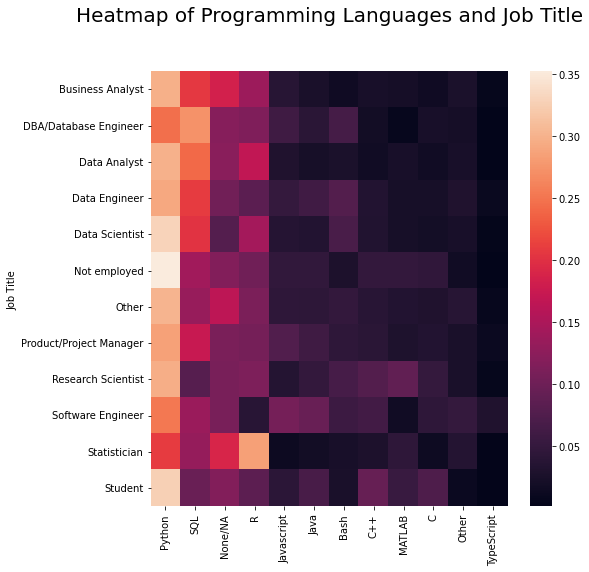

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(8, 8))
fig = sns.heatmap(languages_job_title_grouped)
fig.set_title('Heatmap of Programming Languages and Job Title\n\n', size=20)

### ZADANIE 4 (4 pkt):
Stwórz wykres z podwykresami, który będzie pokazywał Known Programming Language per Job

In [47]:
## Stwórzy wykres danych!
programming_languages = languages_job_title_grouped.columns.tolist()
fig = make_subplots(4, 3, subplot_titles=languages_job_title_grouped.index)
for i, age_range in enumerate(languages_job_title_grouped.index):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Bar(x=programming_languages, y=languages_job_title_grouped.iloc[i]),
        row=row, col=col
    )
fig.update_layout(showlegend=False, height=1000, title="Percent of Known Programming Languages by Job Title")
fig.update_yaxes(tickformat="%")
fig.show()

**Obserwacje**:
- Python jest średnio najpopularniejszym językiem spośród wszystkich stanowisk pracy
- SQL jest najpopularniejszym językiem wśród inżynierów baz danych
- MATLAB jest stosunkowo bardziej popularny wśród naukowców niż na innych stanowiskach pracy
- Statystyk woli R od Pythona
- Studenci i inżynierowie oprogramowania wolą C++ od R

Zróbmy jeszcze jeden wykres - mapę cieplną frameworka, z którego lubi korzystać każda rola zawodowa

In [48]:
## Wykreśl 3 najlepsze frameworki, z których każda rola lubi korzystać
# 28p1 - 28p12
## Utwórz ramkę danych, która zawiera tylko kolumnę z frameworkiem
framework_cols = ["Q28_Part_{}".format(str(i)) for i in range(1, 13)]
framework_df = df[framework_cols]
framework_df

Q28_Part_1     Q28_Part_2 Q28_Part_3     Q28_Part_4 Q28_Part_5  \
11006    Scikit-learn     TensorFlow      Keras             NaN        NaN   
10555    Scikit-learn             NaN        NaN   RandomForest        NaN   
10551              NaN            NaN        NaN            NaN        NaN   
19073              NaN            NaN        NaN            NaN        NaN   
10550              NaN            NaN        NaN            NaN        NaN   
...                ...            ...        ...            ...        ...   
6790               NaN            NaN        NaN            NaN        NaN   
2057               NaN            NaN        NaN   RandomForest   Xgboost    
8874               NaN            NaN        NaN            NaN        NaN   
11743              NaN            NaN        NaN            NaN        NaN   
2797               NaN            NaN        NaN            NaN        NaN   

      Q28_Part_6 Q28_Part_7  Q28_Part_8 Q28_Part_9 Q28_Part_10 Q28_Part_11  \
11006   PyTorch         NaN         NaN        NaN         NaN         NaN   
10555        NaN        NaN         NaN        NaN         NaN         NaN   
10551        NaN        NaN         NaN        NaN         NaN        None   
19073        NaN        NaN         NaN        NaN         NaN         NaN   
10550        NaN        NaN         NaN        NaN         NaN         NaN   
...          ...        ...         ...        ...         ...         ...   
6790         NaN        NaN         NaN        NaN         NaN        None   
2057         NaN        NaN   LightGBM         NaN         NaN         NaN   
8874         NaN        NaN         NaN        NaN         NaN        None   
11743        NaN        NaN         NaN        NaN         NaN         NaN   
2797         NaN        NaN         NaN        NaN         NaN        None   

      Q28_Part_12  
11006         NaN  
10555         NaN  
10551         NaN  
19073         NaN  
10550         NaN  
...           ...  
6790          NaN  
2057        Other  
8874          NaN  
11743         NaN  
2797          NaN  

[19717 rows x 12 columns]

Utwórz ogólną funkcję `get_df_for_dummies()`, która pobiera ramkę danych, ciąg przedrostka nazwy kolumny oraz górny zakres i zwraca ramkę danych wypełnioną zakresem kolumn na podstawie ciągu przedrostka

In [49]:
def get_df_for_dummies(df, prefix_string, end_range, start_range=1):
    ## WSKAZÓWKA: skorzystaj z funckji range oraz iteracji aby wygenerować nazwy kolumn
    dummies_cols = [prefix_string + str(i) for i in range(start_range, end_range)]
    ## WSKAZÓWKA: wyciągnij i zwróć nazwy kolumn z ramki danych
    return df[dummies_cols]

In [50]:
## Utwórz kolumnę w tej ramce danych o nazwie „Użyte struktury” i wypełnij tę kolumnę ramami oddzielonymi przecinkami
framework_col = []
for row in framework_df.itertuples(index=False):
    frameworks_used = [framework for framework in row if isinstance(framework, str)]
    framework_col.append(",".join(frameworks_used))
    
framework_df["frameworks_used"] = framework_col
framework_df

Q28_Part_1     Q28_Part_2 Q28_Part_3     Q28_Part_4 Q28_Part_5  \
11006    Scikit-learn     TensorFlow      Keras             NaN        NaN   
10555    Scikit-learn             NaN        NaN   RandomForest        NaN   
10551              NaN            NaN        NaN            NaN        NaN   
19073              NaN            NaN        NaN            NaN        NaN   
10550              NaN            NaN        NaN            NaN        NaN   
...                ...            ...        ...            ...        ...   
6790               NaN            NaN        NaN            NaN        NaN   
2057               NaN            NaN        NaN   RandomForest   Xgboost    
8874               NaN            NaN        NaN            NaN        NaN   
11743              NaN            NaN        NaN            NaN        NaN   
2797               NaN            NaN        NaN            NaN        NaN   

      Q28_Part_6 Q28_Part_7  Q28_Part_8 Q28_Part_9 Q28_Part_10 Q28_Part_11  \
11006   PyTorch         NaN         NaN        NaN         NaN         NaN   
10555        NaN        NaN         NaN        NaN         NaN         NaN   
10551        NaN        NaN         NaN        NaN         NaN        None   
19073        NaN        NaN         NaN        NaN         NaN         NaN   
10550        NaN        NaN         NaN        NaN         NaN         NaN   
...          ...        ...         ...        ...         ...         ...   
6790         NaN        NaN         NaN        NaN         NaN        None   
2057         NaN        NaN   LightGBM         NaN         NaN         NaN   
8874         NaN        NaN         NaN        NaN         NaN        None   
11743        NaN        NaN         NaN        NaN         NaN         NaN   
2797         NaN        NaN         NaN        NaN         NaN        None   

      Q28_Part_12                                  frameworks_used  
11006         NaN    Scikit-learn ,  TensorFlow , Keras , PyTorch   
10555         NaN                      Scikit-learn , RandomForest  
10551         NaN                                             None  
19073         NaN                                                   
10550         NaN                                                   
...           ...                                              ...  
6790          NaN                                             None  
2057        Other          RandomForest, Xgboost , LightGBM ,Other  
8874          NaN                                             None  
11743         NaN                                                   
2797          NaN                                             None  

[19717 rows x 13 columns]

In [51]:
## Zastąp kolumny puste i None wartościami "None/NA"
values_to_update = {"frameworks_used": {"": "None/NA", "None": "None/NA"}}
framework_df = framework_df.replace(values_to_update)
framework_df

Q28_Part_1     Q28_Part_2 Q28_Part_3     Q28_Part_4 Q28_Part_5  \
11006    Scikit-learn     TensorFlow      Keras             NaN        NaN   
10555    Scikit-learn             NaN        NaN   RandomForest        NaN   
10551              NaN            NaN        NaN            NaN        NaN   
19073              NaN            NaN        NaN            NaN        NaN   
10550              NaN            NaN        NaN            NaN        NaN   
...                ...            ...        ...            ...        ...   
6790               NaN            NaN        NaN            NaN        NaN   
2057               NaN            NaN        NaN   RandomForest   Xgboost    
8874               NaN            NaN        NaN            NaN        NaN   
11743              NaN            NaN        NaN            NaN        NaN   
2797               NaN            NaN        NaN            NaN        NaN   

      Q28_Part_6 Q28_Part_7  Q28_Part_8 Q28_Part_9 Q28_Part_10 Q28_Part_11  \
11006   PyTorch         NaN         NaN        NaN         NaN         NaN   
10555        NaN        NaN         NaN        NaN         NaN         NaN   
10551        NaN        NaN         NaN        NaN         NaN        None   
19073        NaN        NaN         NaN        NaN         NaN         NaN   
10550        NaN        NaN         NaN        NaN         NaN         NaN   
...          ...        ...         ...        ...         ...         ...   
6790         NaN        NaN         NaN        NaN         NaN        None   
2057         NaN        NaN   LightGBM         NaN         NaN         NaN   
8874         NaN        NaN         NaN        NaN         NaN        None   
11743        NaN        NaN         NaN        NaN         NaN         NaN   
2797         NaN        NaN         NaN        NaN         NaN        None   

      Q28_Part_12                                  frameworks_used  
11006         NaN    Scikit-learn ,  TensorFlow , Keras , PyTorch   
10555         NaN                      Scikit-learn , RandomForest  
10551         NaN                                          None/NA  
19073         NaN                                          None/NA  
10550         NaN                                          None/NA  
...           ...                                              ...  
6790          NaN                                          None/NA  
2057        Other          RandomForest, Xgboost , LightGBM ,Other  
8874          NaN                                          None/NA  
11743         NaN                                          None/NA  
2797          NaN                                          None/NA  

[19717 rows x 13 columns]

Utwórz ogólną funkcję `get_dummies()`, która pobiera ramkę danych i zwraca kolumnę wypełnioną wartościami oddzielonymi przecinkami poszczególnych wartości w ramce danych.

In [52]:
def get_dummies_col(df, sep=","):

    ## zainicjuj pustą listę do przechowywania kolumny stringów, która zostanie użyta do utworzenia fikcyjnej ramki danych
    dummies_col = []
    
    ## iteruj po każdym wierszu w ramce danych w sposób, w który możemy uzyskać dostęp do poszczególnych elementów komórek
    ## uzyskaj listę wartości komórek z wiersza (np. listę języków programowania). Upewnij się, że nie dodajesz NaNs
    ## połącz je jako ciąg oddzielony przecinkami i dołącz go do pustej listy w kolumnie
    for row in df.itertuples(index=False):
        values = [item for item in row if isinstance(item, str)]
        dummies_col.append(sep.join(values))
        
    ## utwórz nową kolumnę w dataframe o nazwie "dummies", która przyjmuje zawartość kolumny dummies
    df["dummies"] = dummies_col
    
    ## zamień wszystkie "" i "None" z ramki danych na "None/NA"
    values_to_update = {"dummies": {"": "None/NA", "None": "None/NA"}}
    df = df.replace(values_to_update)
    
    ## zwróć nową ramkę
    return df

In [53]:
## Stwórz ramkę dla frameworków metodą dummies
framework_dummies = framework_df['frameworks_used'].str.get_dummies(sep=',')
framework_dummies

Scikit-learn     TensorFlow    Caret    Fast.ai    Keras   \
11006                1              1        0          0        1   
10555                1              0        0          0        0   
10551                0              0        0          0        0   
19073                0              0        0          0        0   
10550                0              0        0          0        0   
...                ...            ...      ...        ...      ...   
6790                 0              0        0          0        0   
2057                 0              0        0          0        0   
8874                 0              0        0          0        0   
11743                0              0        0          0        0   
2797                 0              0        0          0        0   

        LightGBM    PyTorch    RandomForest   Spark MLib    Xgboost   None/NA  \
11006           0          1              0             0          0        0   
10555           0          0              1             0          0        0   
10551           0          0              0             0          0        1   
19073           0          0              0             0          0        1   
10550           0          0              0             0          0        1   
...           ...        ...            ...           ...        ...      ...   
6790            0          0              0             0          0        1   
2057            1          0              1             0          1        0   
8874            0          0              0             0          0        1   
11743           0          0              0             0          0        1   
2797            0          0              0             0          0        1   

       Other  
11006      0  
10555      0  
10551      0  
19073      0  
10550      0  
...      ...  
6790       0  
2057       1  
8874       0  
11743      0  
2797       0  

[19717 rows x 12 columns]

Stwórz ogólną funkcję `dummies_from_series()`, która pobiera ramkę danych i argument separatora i zwraca dummies dla Serii

In [54]:
def dummies_from_series(series, sep=","):
    ## zwraca dummy ramkę danych z ramki danych.
    # Zapamiętaj, która kolumna została użyta do przypisania ciągów, nad którymi chcemy utworzyć dummies
    return series["dummies"].str.get_dummies(sep=sep)

In [55]:
## Utwórz nową ramkę danych, która połączy tę ramkę danych z rolami stanowisk
frameworks_for_job_role = framework_dummies.join(df["Q5"]).rename(columns={"Q5": "Job Title"})
frameworks_for_job_role

Scikit-learn     TensorFlow    Caret    Fast.ai    Keras   \
11006                1              1        0          0        1   
10555                1              0        0          0        0   
10551                0              0        0          0        0   
19073                0              0        0          0        0   
10550                0              0        0          0        0   
...                ...            ...      ...        ...      ...   
6790                 0              0        0          0        0   
2057                 0              0        0          0        0   
8874                 0              0        0          0        0   
11743                0              0        0          0        0   
2797                 0              0        0          0        0   

        LightGBM    PyTorch    RandomForest   Spark MLib    Xgboost   None/NA  \
11006           0          1              0             0          0        0   
10555           0          0              1             0          0        0   
10551           0          0              0             0          0        1   
19073           0          0              0             0          0        1   
10550           0          0              0             0          0        1   
...           ...        ...            ...           ...        ...      ...   
6790            0          0              0             0          0        1   
2057            1          0              1             0          1        0   
8874            0          0              0             0          0        1   
11743           0          0              0             0          0        1   
2797            0          0              0             0          0        1   

       Other           Job Title  
11006      0             Student  
10555      0             Student  
10551      0             Student  
19073      0      Data Scientist  
10550      0   Software Engineer  
...      ...                 ...  
6790       0        Not employed  
2057       1  Research Scientist  
8874       0               Other  
11743      0               Other  
2797       0        Data Analyst  

[19717 rows x 13 columns]

In [56]:
## Pogrupuj ramkę danych według tytułu stanowiska i zagreguj według języków programowania
frameworks_for_job_role_grouped = frameworks_for_job_role.groupby(["Job Title"]).sum()
frameworks_for_job_role_grouped

Scikit-learn     TensorFlow    Caret    Fast.ai   \
Job Title                                                                     
Business Analyst                     275            140       42         26   
DBA/Database Engineer                 61             33        9          4   
Data Analyst                         684            299      122         44   
Data Engineer                        317            172       23         28   
Data Scientist                      2636           1540      492        298   
Not employed                         478            264       42         42   
Other                                698            424       91         72   
Product/Project Manager              310            207       40         39   
Research Scientist                   725            518       92         83   
Software Engineer                   1182            898       42        139   
Statistician                          81             62       44          5   
Student                             1943           1265      100        169   

                          Keras    LightGBM    PyTorch    RandomForest  \
Job Title                                                                
Business Analyst             128          55         74            179   
DBA/Database Engineer         34           6         14             30   
Data Analyst                 299         144        178            416   
Data Engineer                180          69        119            138   
Data Scientist              1682         916        880           1516   
Not employed                 272         105        145            214   
Other                        422         148        236            316   
Product/Project Manager      175          50        126            159   
Research Scientist           513         130        377            271   
Software Engineer            837         218        531            387   
Statistician                  54          18         29             84   
Student                     1160         307        703            814   

                          Spark MLib    Xgboost   None/NA  Other  
Job Title                                                         
Business Analyst                   21        123      407      5  
DBA/Database Engineer               7         20       68      1  
Data Analyst                       56        314      680     14  
Data Engineer                      79        145      231      8  
Data Scientist                    403       1653      923    117  
Not employed                       35        196      365     14  
Other                              46        296      765     41  
Product/Project Manager            48        129      286     13  
Research Scientist                 44        268      484     42  
Software Engineer                 106        411     1083     47  
Statistician                        9         49      172      6  
Student                            56        639     1610     34

Utwórz ogólną funkcję `group_dummies_by()`, która pobiera ramkę danych dummies oraz Serię i zwraca dummies pogrupowane i zagregowane według Serii.

In [57]:
def group_dummies_by(dummies_df, series):
    series_name = series.name
    to_group = dummies_df.join(series)
    grouped = to_group.groupby([series_name]).sum()
    
    return grouped

In [58]:
framework_df = get_df_for_dummies(df, "Q28_Part_", 13)
framework_df = get_dummies_col(framework_df)
framework_dummies = dummies_from_series(framework_df)
frameworks_for_job_role_grouped = group_dummies_by(framework_dummies, df["Q5"])
frameworks_for_job_role_grouped = frameworks_for_job_role_grouped.div(
    frameworks_for_job_role_grouped.sum(axis=1), axis=0)
frameworks_for_job_role_grouped.index.rename("Job Role", inplace=True)
frameworks_for_job_role_grouped

Scikit-learn     TensorFlow     Caret    Fast.ai   \
Job Role                                                                       
Business Analyst                0.186441       0.094915  0.028475   0.017627   
DBA/Database Engineer           0.212544       0.114983  0.031359   0.013937   
Data Analyst                    0.210462       0.092000  0.037538   0.013538   
Data Engineer                   0.210073       0.113983  0.015242   0.018555   
Data Scientist                  0.201900       0.117953  0.037684   0.022825   
Not employed                    0.220074       0.121547  0.019337   0.019337   
Other                           0.196343       0.119269  0.025598   0.020253   
Product/Project Manager         0.195954       0.130847  0.025284   0.024652   
Research Scientist              0.204398       0.146039  0.025937   0.023400   
Software Engineer               0.200986       0.152695  0.007142   0.023635   
Statistician                    0.132137       0.101142  0.071778   0.008157   
Student                         0.220795       0.143750  0.011364   0.019205   

                           Keras    LightGBM    PyTorch    RandomForest  \
Job Role                                                                  
Business Analyst         0.086780    0.037288   0.050169       0.121356   
DBA/Database Engineer    0.118467    0.020906   0.048780       0.104530   
Data Analyst             0.092000    0.044308   0.054769       0.128000   
Data Engineer            0.119284    0.045726   0.078860       0.091451   
Data Scientist           0.128830    0.070159   0.067402       0.116115   
Not employed             0.125230    0.048343   0.066759       0.098527   
Other                    0.118706    0.041632   0.066385       0.088889   
Product/Project Manager  0.110619    0.031606   0.079646       0.100506   
Research Scientist       0.144629    0.036651   0.106287       0.076403   
Software Engineer        0.142323    0.037069   0.090291       0.065805   
Statistician             0.088091    0.029364   0.047308       0.137031   
Student                  0.131818    0.034886   0.079886       0.092500   

                          Spark MLib    Xgboost    None/NA     Other  
Job Role                                                              
Business Analyst             0.014237   0.083390  0.275932  0.003390  
DBA/Database Engineer        0.024390   0.069686  0.236934  0.003484  
Data Analyst                 0.017231   0.096615  0.209231  0.004308  
Data Engineer                0.052353   0.096090  0.153082  0.005302  
Data Scientist               0.030867   0.126608  0.070695  0.008961  
Not employed                 0.016114   0.090239  0.168048  0.006446  
Other                        0.012940   0.083263  0.215190  0.011533  
Product/Project Manager      0.030341   0.081542  0.180784  0.008217  
Research Scientist           0.012405   0.075557  0.136453  0.011841  
Software Engineer            0.018024   0.069886  0.184152  0.007992  
Statistician                 0.014682   0.079935  0.280587  0.009788  
Student                      0.006364   0.072614  0.182955  0.003864

In [59]:
## Utwórz mapę cieplną powyższej ramki danych
px.imshow(frameworks_for_job_role_grouped, title="Heatmap of preferred Frameworks per Job Role")

**Obserwacje**:
- None/NA może wprowadzać w błąd. Nie zawsze oznacza to, że ich rola nie wymaga frameworków, ponieważ obejmuje również osoby, które być może nie odpowiedziały na pytanie, ponieważ ich narzędzie użytkowania nie było dostępne jako opcja. Na przykład statystyk może używać frameworka R, którego opcja nie jest tutaj podana.
- Scikit-learn jest najpopularniejszym wymienionym narzędziem
- Statystycy często używają lasu losowego (Random Forest)

**Roczne wynagrodzenie**

Zacznijmy teraz rozważać naszą zmienną docelową! Zaczniemy od od początku. Narysujmy histogram zarobków i posortujmy ten wykres w kolejności zakresów wynagrodzeń

In [60]:
px.histogram(df, "Q10", labels={"Q10": "Salary"}, title="Count of salary ranges (Unsorted)")

Widzę już z tego kilka interesujących ustaleń, ale zanim wspomnę o czymkolwiek, chcę, abyśmy posortowali oś x w kolejności wartości liczbowej. Oznacza to, że skrajna lewa kolumna to `0-999 USD`, a skrajna prawa to `> 500 000 USD`.

Poświęć trochę czasu na przemyślenie i wdrożenie sposobu rozwiązania tego problemu. Jeśli po kilku minutach nie jesteś w stanie wymyślić/wymyślić rozwiązania, przeczytaj i zaimplementuj wg. poniższych kroków.

<details>
<summary><b> Kliknij tutaj, aby wyświetlić moje rozwiązanie</b></summary>
<ul>
<li>Utwórz nową ramkę danych z samymi pensjami</li>
<li>Utwórz set wynagrodzeń (unikalne wartości)</li>
<li>Utwórz mapowanie kategorii wynagrodzeń na int, gdzie int to pierwsza numeryczna część ciągu (np. <code>{"$0-999": 0, "100,000-124,999": 100000}</code >). Ta część będzie wymagała użycia metod `.replace()` i `.split()` natywnych dla Pythona
<li>Zastąp pensje w ramce danych wartością całkowitą</li>
<li>Posortuj ramkę danych w rosnącej kolejności numerycznej</li>
<li>Odwróć mapowanie i zastąp int ich wariantem ciągu</li>
<li>Wykreśl ramkę danych i zastąp etykiety x ciągami wynagrodzeń</li>
</ul>
</details>

In [61]:
salary_df = pd.DataFrame(df["Q10"])
salary_df.rename(columns={"Q10": "Salary"}, inplace=True)
salary_set = set(salary_df["Salary"])
salary_string_int_dict = dict()

for string_salary in salary_set:
    
    if isinstance(string_salary, float): continue
        
    salary = string_salary.replace("$", "").replace("> ", "").replace(",", "")
    salary = salary.split("-")[0]
    salary_string_int_dict[string_salary] = int(salary)

values_to_update = {"Salary": salary_string_int_dict}
salary_df = salary_df.replace(values_to_update)
salary_df = salary_df.sort_values("Salary")

salary_int_string_dict = {v:k for k,v in salary_string_int_dict.items()}
values_to_update = {"Salary": salary_int_string_dict}
salary_df = salary_df.replace(values_to_update)

percent_na = np.round(100 * salary_df["Salary"].isna().sum()/len(salary_df), 2)
print("Percent of users who didn't answer the salary question:", percent_na)
px.histogram(salary_df, "Salary", title="Count of Salary ranges")

Percent of users who didn't answer the salary question: 36.62


Prawie 37% uczestników ankiety wprost nie odpowiedziało na to pytanie. Wydaje się, że jest dziwnie duża liczba ludzi, którzy zarabiają od \\$0 do \\$999 rocznie. Podejrzewam, że jest to tak wysokie, ponieważ wiele osób, które nie chciały odpowiedzieć na pytanie (i nie zdawały sobie sprawy, że jest to opcjonalne) zaznaczyło to pole. Możemy również zauważyć kilka innych interesujących faktów - to znaczy - wydaje się, że mamy "dwa" szczyty przy bardzo różnych zarobkach - jeden na poziomie 10 000 - 14 999, a drugi na 100 000 - 124 999. Czy możesz pomyśleć, dlaczego tak może być? Wygląda też na to, że jest kilku bardzo bogatych kagglerów, z których 83 zarabia ponad $500k rocznie.

Trzy najbardziej popularne grupy zarobków (poza 0 - 999) wydają się wynosić 10 000 - 14 999, 100 000 - 124 999 i 30 000 - 39 999. Przygotuj kartogram przedstawiający medianę wynagrodzeń w krajach, abyśmy mogli lepiej rozróżnić, w jakich regionach możemy spodziewać się zarobków

In [62]:
## Przygotuj kartogram przedstawiający medianę wynagrodzeń w krajach
median_salaries_df = df[["Q3", "Q10"]]
median_salaries_df.rename(columns={"Q3": "Country", "Q10": "Salary"}, inplace=True)
values_to_update = {"Salary": salary_string_int_dict}
median_salaries_df = median_salaries_df.replace(values_to_update)
median_salaries_df = median_salaries_df.groupby(["Country"]).median()
median_salaries_df

Salary
Country                           
Algeria                     1000.0
Argentina                  10000.0
Australia                  90000.0
Austria                    50000.0
Bangladesh                  4000.0
Belarus                    10000.0
Belgium                    50000.0
Brazil                     10000.0
Canada                     60000.0
Chile                      25000.0
China                      10000.0
Colombia                   10000.0
Czech Republic             22500.0
Denmark                    70000.0
Egypt                       2000.0
France                     40000.0
Germany                    60000.0
Greece                     15000.0
Hong Kong                  40000.0
Hungary                    20000.0
India                       7500.0
Indonesia                   3000.0
Iran                        1000.0
Ireland                    50000.0
Israel                     90000.0
Italy                      30000.0
Japan                      40000.0
Kenya                       2000.0
Malaysia                   10000.0
Mexico                     15000.0
Morocco                     4500.0
Netherlands                50000.0
New Zealand                70000.0
Nigeria                     1000.0
Norway                     80000.0
Other                      10000.0
Pakistan                    3000.0
Peru                        4000.0
Philippines                 5000.0
Poland                     25000.0
Portugal                   20000.0
Republic of Korea          25000.0
Romania                    17500.0
Russia                     10000.0
Saudi Arabia               40000.0
Singapore                  50000.0
South Africa               27500.0
Spain                      30000.0
Sweden                     50000.0
Switzerland               100000.0
Taiwan                     25000.0
Thailand                   15000.0
Tunisia                     2000.0
Turkey                     10000.0
Ukraine                    10000.0
United Kingdom             60000.0
United States of America  100000.0
Vietnam                     1000.0

In [63]:
country_codes = []
for country in median_salaries_df.index:
    country_code = pycountry.countries.search_fuzzy(country)[0] # Weź pierwszy element zwracany przez przybliżone wyszukiwanie
    country_codes.append(country_code.alpha_3)

median_salaries_df["Country Code"] = country_codes
median_salaries_df

Salary Country Code
Country                                        
Algeria                     1000.0          DZA
Argentina                  10000.0          ARG
Australia                  90000.0          AUS
Austria                    50000.0          AUT
Bangladesh                  4000.0          BGD
Belarus                    10000.0          BLR
Belgium                    50000.0          BEL
Brazil                     10000.0          BRA
Canada                     60000.0          CAN
Chile                      25000.0          CHL
China                      10000.0          CHN
Colombia                   10000.0          COL
Czech Republic             22500.0          CZE
Denmark                    70000.0          DNK
Egypt                       2000.0          EGY
France                     40000.0          FRA
Germany                    60000.0          DEU
Greece                     15000.0          GRC
Hong Kong                  40000.0          HKG
Hungary                    20000.0          HUN
India                       7500.0          IND
Indonesia                   3000.0          IDN
Iran                        1000.0          IRN
Ireland                    50000.0          IRL
Israel                     90000.0          ISR
Italy                      30000.0          ITA
Japan                      40000.0          JPN
Kenya                       2000.0          KEN
Malaysia                   10000.0          MYS
Mexico                     15000.0          MEX
Morocco                     4500.0          MAR
Netherlands                50000.0          NLD
New Zealand                70000.0          NZL
Nigeria                     1000.0          NGA
Norway                     80000.0          NOR
Other                      10000.0          GBR
Pakistan                    3000.0          PAK
Peru                        4000.0          PER
Philippines                 5000.0          PHL
Poland                     25000.0          POL
Portugal                   20000.0          PRT
Republic of Korea          25000.0          PRK
Romania                    17500.0          ROU
Russia                     10000.0          RUS
Saudi Arabia               40000.0          SAU
Singapore                  50000.0          SGP
South Africa               27500.0          ZAF
Spain                      30000.0          ESP
Sweden                     50000.0          SWE
Switzerland               100000.0          CHE
Taiwan                     25000.0          TWN
Thailand                   15000.0          THA
Tunisia                     2000.0          TUN
Turkey                     10000.0          TUR
Ukraine                    10000.0          UKR
United Kingdom             60000.0          GBR
United States of America  100000.0          USA
Vietnam                     1000.0          VNM

In [64]:
salaries_series = median_salaries_df["Salary"]
values_to_update = {"Salary": salary_int_string_dict}
median_salaries_df = median_salaries_df.replace(values_to_update)
median_salaries_df["Salary Values"] = salaries_series

In [65]:
px.choropleth(median_salaries_df, locations="Country Code", hover_name=median_salaries_df.index, color="Salary Values", hover_data=["Salary"], title="Median Salaries by Country")

Biorąc pod uwagę liczbę uczestników z USA i Indii, którą rozpoznaliśmy wcześniej, możemy przyjąć te wartości, aby były bardziej poprawne w stosunku do rozkładu generowania danych niż w większości innych krajów. Działając przy tym założeniu, wygląda na to, że w USA i Szwajcarii rozsądnie byłoby być na 100 000+, podczas gdy w Indiach najprawdopodobniej zarabialiby coś w przedziale 7500 - 9999. Wygląda na to, że Australia też ma kilka dobrze płatnych miejsc pracy. Spodziewalibyśmy się, że średnia pensja w Wielkiej Brytanii będzie wyższa niż 10 000 - 14 999. Jakie rzeczy moglibyśmy zbadać, aby określić, dlaczego ta wartość wynagrodzenia jest niższa, niż się spodziewamy?

A co z wynagrodzeniami według płci?

In [66]:
salaries_by_gender_df = df[["Q2", "Q10"]]
salaries_by_gender_df.rename(columns={"Q2": "Gender", "Q10": "Salary"}, inplace=True)
values_to_update = {"Salary": salary_string_int_dict}
salaries_by_gender_df = salaries_by_gender_df.replace(values_to_update)
salaries_by_gender_df

Gender    Salary
11006               Male       NaN
10555               Male       NaN
10551               Male       NaN
19073               Male       NaN
10550               Male    1000.0
...                  ...       ...
6790                Male       NaN
2057                Male  300000.0
8874                Male  100000.0
11743  Prefer not to say       NaN
2797                Male   60000.0

[19717 rows x 2 columns]

Stwórzmy wykres pudełkowy salary per gender

In [67]:
px.box(salaries_by_gender_df, "Gender", "Salary", labels={"Salary": "Salary (Lower Bound)"}, title="Boxplot of Salary per Gender")

Chociaż wygląda na to, że którakolwiek z kategorii jest w stanie osiągnąć najwyższy przedział zarobków, wydaje się, że kobiety mają najniższą medianę zarobków. Wydaje się, że ci, którzy wolą opisywać siebie, mają również wyższe średnie zarobki.

Jakie są najlepiej płatne prace? Wykreślmy średnią pensję każdej roli

In [68]:
salaries_job_df = df[["Q5", "Q10"]]
salaries_job_df.rename(columns={"Q5": "Job Title", "Q10": "Salary"}, inplace=True)

values_to_update = {"Salary": salary_string_int_dict}
salaries_job_df = salaries_job_df.replace(values_to_update)
salaries_job_df

# salary_series = salaries_job_df["Salary"]
# salaries_job_df["Salary Bracket"] = salary_series
# salaries_job_df

Job Title    Salary
11006             Student       NaN
10555             Student       NaN
10551             Student       NaN
19073      Data Scientist       NaN
10550   Software Engineer    1000.0
...                   ...       ...
6790         Not employed       NaN
2057   Research Scientist  300000.0
8874                Other  100000.0
11743               Other       NaN
2797         Data Analyst   60000.0

[19717 rows x 2 columns]

In [69]:
grouped_mean_salaries = salaries_job_df.groupby(["Job Title"]).mean().reset_index().sort_values(by="Salary", ascending=False)
grouped_mean_salaries.dropna(inplace=True)
px.bar(grouped_mean_salaries, "Job Title", "Salary", labels={"Salary": "Mean Salary"}, title="Mean Salary per Job Role")

Jaki może być może bardziej informacyjny sposób przedstawienia tych wynagrodzeń? Myślę o wykresie pudełkowym. Odrzućmy pensje NA i „0” i zwizualizujmy to

### ZADANIE 6 (1 pkt):
Stwórz wykres pudełkowy dla wynagrodzeń.

In [70]:
salaries_job_df.dropna(inplace=True)
salaries_job_df = salaries_job_df[salaries_job_df["Salary"] != 0]
fig = px.box(salaries_job_df, "Job Title", "Salary", labels={"Salary": "Salary (Lower Bound of Bracket)"}, title="Boxplot of Salary per Job Role")
fig.show()

**Obserwacje**:
- Ankieta wydaje się wskazywać, że wszystkie role zawodowe mają potencjał do zdobycia pracy za \\$500k+ poza pracą inżyniera bazy danych
- Na całym świecie inżynierowie oprogramowania i analitycy danych mają dwie najniższe średnie pensje - przy czym inżynier oprogramowania ma niższą medianę wynagrodzenia niż analityk danych, ale wyższą średnią (jak widać na pierwszym wykresie)
- Zarządzanie produktami/projektami i Data Science 😉 wydają się być najbardziej lukratywnymi stanowiskami pracy - przy czym ta pierwsza nieznacznie przejmuje inicjatywę

Zastanówmy sie, jaki jest procent data scientists, którzy zarabiają powyżej \\500 tys. USD w porównaniu z kierownikami projektów:

In [71]:
num_data_scientists_above_500 = len(salaries_job_df[(salaries_job_df["Job Title"] == "Data Scientist") & (salaries_job_df["Salary"] == 500000)])
num_project_managers_above_500 = len(salaries_job_df[(salaries_job_df["Job Title"] == "Product/Project Manager") & (salaries_job_df["Salary"] == 500000)])

percent_ds_above_500 = 100 * num_data_scientists_above_500/len(salaries_job_df)
percent_pm_above_500 = 100 * num_project_managers_above_500/len(salaries_job_df)

print("The percent of Data Scientists who earn above $500,000: {}%".format(np.round(percent_ds_above_500, 2)))
print("The percent of Project Managers who earn above $500,000: {}%".format(np.round(percent_pm_above_500, 2)))

The percent of Data Scientists who earn above $500,000: 0.2%
The percent of Project Managers who earn above $500,000: 0.06%


Zobaczmy, jaki wpływ mają lata programowania (Q11) na wynagrodzenia

In [72]:
programming_experience_salary_df = df[["Q10", "Q15"]]
programming_experience_salary_df.rename(columns={"Q10": "Salary", "Q15": "Programming Experience"}, inplace=True)
values_to_update = {"Salary": salary_string_int_dict}
programming_experience_salary_df = programming_experience_salary_df.replace(values_to_update)
programming_experience_salary_df

Salary Programming Experience
11006       NaN              < 1 years
10555       NaN              < 1 years
10551       NaN              < 1 years
19073       NaN                    NaN
10550    1000.0              3-5 years
...         ...                    ...
6790        NaN              < 1 years
2057   300000.0              20+ years
8874   100000.0              1-2 years
11743       NaN                    NaN
2797    60000.0              1-2 years

[19717 rows x 2 columns]

In [73]:
category_array = ["I have never written code", "< 1 years", "1-2 years", "3-5 years", "5-10 years", "10-20 years", "20+ years"]
# fig = px.scatter(programming_experience_salary_df, "Programming Experience", "Salary", title="Density of Programming Experience vs Salary")
fig = px.scatter(programming_experience_salary_df, "Programming Experience", "Salary", facet_col=df["Q2"],title="Density of Programming Experience vs Salary")
fig.update_traces(marker=dict(
            opacity=0.05,
            size=20,
            line=dict(
                color='MediumPurple',
                width=0.5
            )))
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':category_array})
fig.show()

**Obserwacje**:
- Są ludzie zarabiający \\$500k+, którzy nigdy nie napisali kodu. To samo z ludźmi, którzy mają mniej niż rok doświadczenia w programowaniu.
- Istnieje jednak trend, w którym bardziej doświadczeni programiści zarabiają wyższe wynagrodzenie na wszystkich poziomach wynagrodzeń
- Nie ma zbyt wielu doświadczonych kobiet (tj. ponad 10-20 lat doświadczenia)

Teraz narysujemy kolejny diagram Sankeya – tym razem śledzący, w jaki sposób płeć, wiek, stopień naukowy, rola i kraj wpływają na twoją pensję. Aby to osiągnąć, uogólnij kod, który napisałam wcześniej dla diagramu Sankeya, do funkcji `get_sankey_data`, która jako argument pobiera ponownie zindeksowaną ramkę danych i zwraca node_labels oraz słownik `link`. Następnie użyj tych elementów, aby wykreślić diagram Sankeya

### *ZADANIE 7 (10 pkt):
Zadanie dla chętnych, na dodatkowe punkty
Stwórzy wykres z podwykresami, który będzie pokazywał Percent of Known Programming Languages by Age
Teraz narysujemy kolejny diagram Sankeya – tym razem śledzący, w jaki sposób płeć, wiek, stopień naukowy, rola i kraj wpływają na twoją pensję. Aby to osiągnąć, uogólnij kod, który napisałam wcześniej dla diagramu Sankeya, do funkcji `get_sankey_data`, która jako argument pobiera ponownie zindeksowaną ramkę danych i zwraca node_labels oraz słownik `link`. Następnie użyj tych elementów, aby wykreślić diagram Sankeya

In [ ]:
## Wykorzystaj ponownie kod do Sankeya


In [ ]:
## utwórz nową ramkę danych z odpowiednimi zmiennymi, za pomocą których chcemy wykreślić naszego Sankeya, ponownie zindeksuj go i przekaż do funkcji get_sankey_data


In [ ]:

fig.show()

Powyższy schemat jest chaotyczny, uporządkujmy go w następujący sposób:
- Pogrupuj kraje według kontynentów (znowu nie zmienimy Indii i USA)
- Stwórz szersze przedziały na pensję (może 5 przedziałów?), usuwając \\$0-999
- Dodaj doświadczenie w programowaniu jako kolumnę na powyższym wykresie

In [ ]:
## Zamień kraje na kontynenty
values_to_update = {"Country": countries_continent_dict}
salaries_sankey_df = salaries_sankey_df.replace(values_to_update)
salaries_sankey_df

Gender    Age  \
11006               Male  18-21   
10555               Male  18-21   
10551               Male  18-21   
19073               Male  18-21   
10550               Male  18-21   
...                  ...    ...   
6790                Male    70+   
2057                Male    70+   
8874                Male    70+   
11743  Prefer not to say    70+   
2797                Male    70+   

                                               Education                Role  \
11006                                  Bachelor’s degree             Student   
10555                                    Master’s degree             Student   
10551                                  Bachelor’s degree             Student   
19073                                    Master’s degree      Data Scientist   
10550                                  Bachelor’s degree   Software Engineer   
...                                                  ...                 ...   
6790   Some college/university study without earning ...        Not employed   
2057                                     Doctoral degree  Research Scientist   
8874                                     Doctoral degree               Other   
11743                             I prefer not to answer               Other   
2797                                     Master’s degree        Data Analyst   

                        Country           Salary  
11006                      Asia              NaN  
10555                     India              NaN  
10551                      Asia              NaN  
19073  United States of America              NaN  
10550                     India      1,000-1,999  
...                         ...              ...  
6790              North America              NaN  
2057   United States of America  300,000-500,000  
8874   United States of America  100,000-124,999  
11743                     Other              NaN  
2797   United States of America    60,000-69,999  

[19717 rows x 6 columns]

In [ ]:
## Usuń wiersze z pensją $0-999 oraz zwiększ przedziały pensji
set(salaries_sankey_df["Salary"])
salaries_sankey_df = salaries_sankey_df[salaries_sankey_df["Salary"] != "$0-999"]
under_30000, under_80000, under_150000, under_300000, under_500000 = "0 - 29,999", "30,000 - 79,999", "80,000 - 149,999", "150,000 - 299,999", "300,000 - 500,000" 
salary_wider_bins_dict = dict()
for salary_string in set(salaries_sankey_df["Salary"]):
    
    if salary_string == "> $500,000" or isinstance(salary_string, float):
        continue
    
    salary_upper_bound = salary_string.split("-")[-1]
    salary_upper_bound = salary_upper_bound.replace(",", "")
    salary_upper_bound = int(salary_upper_bound)
    
    if salary_upper_bound < 30000:
        salary_wider_bins_dict[salary_string] = under_30000
    elif salary_upper_bound < 80000:
        salary_wider_bins_dict[salary_string] = under_80000
    elif salary_upper_bound < 150000:
        salary_wider_bins_dict[salary_string] = under_150000
    elif salary_upper_bound < 300000:
        salary_wider_bins_dict[salary_string] = under_300000
    elif salary_upper_bound < 500000:
        salary_wider_bins_dict[salary_string] = under_500000

values_to_update = {"Salary": salary_wider_bins_dict}
salaries_sankey_df = salaries_sankey_df.replace(values_to_update)
salaries_sankey_df

Gender    Age  \
11006               Male  18-21   
10555               Male  18-21   
10551               Male  18-21   
19073               Male  18-21   
10550               Male  18-21   
...                  ...    ...   
6790                Male    70+   
2057                Male    70+   
8874                Male    70+   
11743  Prefer not to say    70+   
2797                Male    70+   

                                               Education                Role  \
11006                                  Bachelor’s degree             Student   
10555                                    Master’s degree             Student   
10551                                  Bachelor’s degree             Student   
19073                                    Master’s degree      Data Scientist   
10550                                  Bachelor’s degree   Software Engineer   
...                                                  ...                 ...   
6790   Some college/university study without earning ...        Not employed   
2057                                     Doctoral degree  Research Scientist   
8874                                     Doctoral degree               Other   
11743                             I prefer not to answer               Other   
2797                                     Master’s degree        Data Analyst   

                        Country            Salary  
11006                      Asia               NaN  
10555                     India               NaN  
10551                      Asia               NaN  
19073  United States of America               NaN  
10550                     India        0 - 29,999  
...                         ...               ...  
6790              North America               NaN  
2057   United States of America   300,000-500,000  
8874   United States of America  80,000 - 149,999  
11743                     Other               NaN  
2797   United States of America   30,000 - 79,999  

[18204 rows x 6 columns]

In [ ]:
## Utwórz nową kolumnę w salaries_sankey_df, która jest długością doświadczenia w programowaniu
salaries_sankey_df["Programming Experience"] = df["Q15"]
salaries_sankey_df

Gender    Age  \
11006               Male  18-21   
10555               Male  18-21   
10551               Male  18-21   
19073               Male  18-21   
10550               Male  18-21   
...                  ...    ...   
6790                Male    70+   
2057                Male    70+   
8874                Male    70+   
11743  Prefer not to say    70+   
2797                Male    70+   

                                               Education                Role  \
11006                                  Bachelor’s degree             Student   
10555                                    Master’s degree             Student   
10551                                  Bachelor’s degree             Student   
19073                                    Master’s degree      Data Scientist   
10550                                  Bachelor’s degree   Software Engineer   
...                                                  ...                 ...   
6790   Some college/university study without earning ...        Not employed   
2057                                     Doctoral degree  Research Scientist   
8874                                     Doctoral degree               Other   
11743                             I prefer not to answer               Other   
2797                                     Master’s degree        Data Analyst   

                        Country            Salary Programming Experience  
11006                      Asia               NaN              < 1 years  
10555                     India               NaN              < 1 years  
10551                      Asia               NaN              < 1 years  
19073  United States of America               NaN                    NaN  
10550                     India        0 - 29,999              3-5 years  
...                         ...               ...                    ...  
6790              North America               NaN              < 1 years  
2057   United States of America   300,000-500,000              20+ years  
8874   United States of America  80,000 - 149,999              1-2 years  
11743                     Other               NaN                    NaN  
2797   United States of America   30,000 - 79,999              1-2 years  

[18204 rows x 7 columns]

In [ ]:
## Zmień indeks i wy świetl wykres Sankeya
# Usuń kolumny Age i Gender ci zmień indeksy ramki na:
# Role, Programming Experience, Region, Education, Salary
salaries_sankey_df = salaries_sankey_df.rename(columns={"Country": "Region"})
salaries_sankey_df = salaries_sankey_df.reindex(["Role", "Programming Experience", "Region", "Education", "Salary"], axis=1)
node_labels, link = get_sankey_data(salaries_sankey_df)
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = "blue"
    ),
    link = link)])

fig.update_layout(title_text="Sankey Diagram (Role, Programming Experience, Region, Education, Salary)", font_size=10, height=800)
fig.show()

Informacje i ścieżki do różnych przedziałów wynagrodzeń stają się teraz znacznie bardziej zrozumiałe do interpretacji. Niektóre interesujące odkrycia, które znalazłam na tym wykresie, to fakt, że jest kilku inżynierów oprogramowania i naukowców zajmujących się danymi, którzy nigdy wcześniej nie pisali kodu - nie jestem przekonana, czy to prawda, ale jest ich niewielu, więc moglibyśmy to przyjąć jako obserwacje odstające. Większość osób zarabiających powyżej 150 000 wydaje się mieć stopień magistra lub doktora. Zabawa z kolejnością indeksowania może szybko umożliwić wyciągnięcie wniosków z różnych kombinacji kolumn (np. umieszczając Education przed Job title, możemy zobaczyć, w jakie role obejmą ludzie, na podstawie ich wykształcenia).

Ostatni wykres dla pytania 9, które dotyczy umiejętności i obowiązków związanych z ich obecną pracą. Utwórz poboczne wykresy tych umiejętności, zagregowane, dla każdego przedziału wynagrodzeń. Użyj 6 przedziałów wynagrodzeń, które zdefiniowaliśmy wcześniej. Upewnij się, że kolumny tworzonej ramki danych skills są nienaruszone i zademonstruj swój wykres/i wszelkie inne dane wyjściowe Pythona w zrozumiały sposób. 

In [ ]:
skills_df = get_df_for_dummies(df, "Q9_Part_", 9)
skills_df = get_dummies_col(skills_df, sep="::")
skills_dummies = dummies_from_series(skills_df, sep="::")
skills_grouped = group_dummies_by(skills_dummies, salaries_sankey_df["Salary"])
skills_grouped = skills_grouped.reindex(["0 - 29,999", "30,000 - 79,999", "80,000 - 149,999", "150,000 - 299,999", "300,000-500,000", "> $500,000"])
skills_grouped

Analyze and understand data to influence product or business decisions  \
Salary                                                                                      
0 - 29,999                                                      2030                        
30,000 - 79,999                                                 1674                        
80,000 - 149,999                                                1237                        
150,000 - 299,999                                                465                        
300,000-500,000                                                   46                        
> $500,000                                                        41                        

                   Build and/or run a machine learning service that operationally improves my product or workflows  \
Salary                                                                                                               
0 - 29,999                                                      1094                                                 
30,000 - 79,999                                                  901                                                 
80,000 - 149,999                                                 705                                                 
150,000 - 299,999                                                278                                                 
300,000-500,000                                                   33                                                 
> $500,000                                                        24                                                 

                   Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data  \
Salary                                                                                                                                
0 - 29,999                                                      1140                                                                  
30,000 - 79,999                                                  984                                                                  
80,000 - 149,999                                                 767                                                                  
150,000 - 299,999                                                281                                                                  
300,000-500,000                                                   36                                                                  
> $500,000                                                        30                                                                  

                   Build prototypes to explore applying machine learning to new areas  \
Salary                                                                                  
0 - 29,999                                                      1497                    
30,000 - 79,999                                                 1441                    
80,000 - 149,999                                                1121                    
150,000 - 299,999                                                446                    
300,000-500,000                                                   47                    
> $500,000                                                        30                    

                   Do research that advances the state of the art of machine learning  \
Salary                                                                                  
0 - 29,999                                                       825                    
30,000 - 79,999                                                  585                    
80,000 - 149,999                                                 397                    
150,000 - 299,999                                                194                    
3

In [ ]:
skills_df_columns = skills_grouped.columns
skills_df_columns_mapping = {col: i for i, col in enumerate(skills_df_columns)}
skills_grouped = skills_grouped.rename(columns=skills_df_columns_mapping)
[print(i, "\t", col) for col, i in skills_df_columns_mapping.items()]
print()

0 	 Analyze and understand data to influence product or business decisions
1 	 Build and/or run a machine learning service that operationally improves my product or workflows
2 	 Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
3 	 Build prototypes to explore applying machine learning to new areas
4 	 Do research that advances the state of the art of machine learning
5 	 Experimentation and iteration to improve existing ML models
6 	 None of these activities are an important part of my role at work
7 	 None/NA
8 	 Other



In [ ]:
## Stwórz wykresy. Oś x powinna być 4 najlepszymi językami programowania, a oś y ich liczbą.
fig = make_subplots(2, 3, subplot_titles=skills_grouped.index)
for i, role in enumerate(skills_grouped.index):
    row = (i // 3) + 1
    col = (i % 3) + 1
    skills_values = skills_grouped.iloc[i]
    fig.add_trace(
        go.Bar(x=skills_values.index, y=skills_values),
        row=row, col=col
    )
    fig.update_xaxes(type="category")
fig.update_layout(showlegend=False, height=800, title="Skills/Responsibilities per Salary Bracket")
fig.show()

**Obserwacje:**
- We wszystkich przedziałach wynagrodzeń obecne jest 0 -„Analyze and understand data to influence product or business decisions”.
- Oprócz najniższego i najwyższego przedziału, wygląda na to, że wiele zadań obejmuje 3 - "Builing prototypes which explores applying machine learning to new area".
- Dwa górne przedziały wynagrodzeń mają wyższą względną częstotliwość odpowiedzi 4 - "Do research that advances the state of the art of machine learning".
- Wydaje się, że w ostatnich trzech nawiasach wyższy odsetek pracowników ma odpowiedzialność za opcję 5 - "Experimentation and iteration to improve existing ML models".
- Opcja 7 - "None/NA" - wydaje się być bardziej rozpowszechniona w dwóch dolnych nawiasach i najwyższym nawiasie. Podejrzewam, że powodem tego jest to, że żaden z opisów stanowisk nie odnosi się do tych osób, podczas gdy pozostałe trzy przedziały mają obowiązki skoncentrowane bardziej na data science i uczeniu maszynowym.

Jaki rodzaj wykresu mógł pokazać te informacje w bardziej przejrzysty i zwięzły sposób?